In [1]:
import torch
from torch import nn
from torch.autograd import Variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from LSTM import *
import pandas as pd
import numpy as np
import torch.utils.data as utils
import time
import os
import pickle

import pdb

# For the notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

torch.manual_seed(1)

In [2]:
gt_test_coord_1 = pickle.load( open( "../import_dataset_2/test/gt_test_coord_1.pkl", "rb" ) )
in_test_coord_1 = pickle.load( open( "../import_dataset_2/test/in_test_coord_1.pkl", "rb" ) )
inputs_test_1 = pickle.load( open( "../import_dataset_2/test/inputs_test_1.pkl", "rb" ) )

gt_test_coord_2 = pickle.load( open( "../import_dataset_2/test/gt_test_coord_2.pkl", "rb" ) )
in_test_coord_2 = pickle.load( open( "../import_dataset_2/test/in_test_coord_2.pkl", "rb" ) )
inputs_test_2 = pickle.load( open( "../import_dataset_2/test/inputs_test_2.pkl", "rb" ) )

gt_test_coord_3 = pickle.load( open( "../import_dataset_2/test/gt_test_coord_3.pkl", "rb" ) )
in_test_coord_3 = pickle.load( open( "../import_dataset_2/test/in_test_coord_3.pkl", "rb" ) )
inputs_test_3 = pickle.load( open( "../import_dataset_2/test/inputs_test_3.pkl", "rb" ) )

inputs_test_1 = inputs_test_1[:,:,2:]
inputs_test_2 = inputs_test_2[:,:,2:]
inputs_test_3 = inputs_test_3[:,:,2:]

inputs_test = np.concatenate((inputs_test_1,inputs_test_2,inputs_test_3),axis=1)
in_test_coord = np.concatenate((in_test_coord_1,in_test_coord_2,in_test_coord_3),axis=1)
gt_test_coord = np.concatenate((gt_test_coord_1,gt_test_coord_2,gt_test_coord_3),axis=1)

inputs_test = torch.from_numpy(inputs_test).float()

inputs_test_1 = torch.from_numpy(inputs_test_1).float()

inputs_test_2 = torch.from_numpy(inputs_test_2).float()

inputs_test_3 = torch.from_numpy(inputs_test_3).float()
inputs_test_1.shape, inputs_test_2.shape, inputs_test_3.shape,inputs_test.shape



(torch.Size([10, 251, 162]),
 torch.Size([10, 1007, 162]),
 torch.Size([10, 460, 162]),
 torch.Size([10, 1718, 162]))

##### Full LSTM

In [3]:
full_lstm = LSTM(input_size = inputs_test_1.shape[2], output_size = 2,
                 num_layers=2, hidden_size=128)
full_lstm.load_state_dict(torch.load('../model_rodolphe/model_results/speed_2.pt'))


In [4]:
output_test = full_lstm.predict(inputs_test)
output_test = output_test.data.numpy()

output_test_1 = full_lstm.predict(inputs_test_1)
output_test_1 = output_test_1.data.numpy()

output_test_2 = full_lstm.predict(inputs_test_2)
output_test_2 = output_test_2.data.numpy()

output_test_3 = full_lstm.predict(inputs_test_3)
output_test_3 = output_test_3.data.numpy()
output_test_1.shape

(10, 251, 2)

In [5]:
output_coord_1=np.zeros([11,inputs_test_1.shape[1],2])
for j in range(11):
    for i in range(inputs_test_1.shape[1]):
        if j==0:
            output_coord_1[j,i,:] = in_test_coord_1[9,i,0:2]
        else:
            output_coord_1[j,i,:] = output_test_1[j-1,i,:]*0.4 + output_coord_1[j-1,i,0:2]
print(output_coord_1)

[[[ 0.06        0.02      ]
  [ 0.00894427  0.0491935 ]
  [ 0.          0.        ]
  ...
  [-0.31752165 -0.14758049]
  [-1.05988068  0.46081769]
  [-0.07778175  0.19091883]]

 [[ 0.05152107  0.2438721 ]
  [ 0.01830299  0.33814782]
  [ 0.00460302  0.33900577]
  ...
  [-0.31625689 -0.01558952]
  [-1.05605445  0.81308648]
  [-0.06789516  0.2990883 ]]

 [[ 0.04304213  0.46774419]
  [ 0.03595139  0.58908239]
  [ 0.00964698  0.6794439 ]
  ...
  [-0.31428137  0.08373887]
  [-1.03481058  1.01512189]
  [-0.06924792  0.43058596]]

 ...

 [[-0.47770977  1.39426881]
  [ 0.08809744  2.05906033]
  [ 0.05299353  2.6223146 ]
  ...
  [-0.35684738  1.09043345]
  [-1.42258452  2.05456582]
  [-0.18671979  1.20264563]]

 [[-0.72789988  1.51598694]
  [ 0.09744917  2.30412471]
  [ 0.06047668  2.95026371]
  ...
  [-0.35100554  1.34387004]
  [-1.49943426  2.2201975 ]
  [-0.18445766  1.54156799]]

 [[-1.02058664  1.6310832 ]
  [ 0.10526268  2.53643873]
  [ 0.06811251  3.27330965]
  ...
  [-0.41494968  1.303354

In [6]:
dist = np.zeros(inputs_test_1.shape[1])
for i in range(inputs_test_1.shape[1]):
    dist[i] = np.sqrt(sum((gt_test_coord_1[10,i,:]-output_coord_1[10,i,:])**2))
    
final_coord_error = np.mean(dist)
print('The final distance between the ground trought and the predicted coordinates is :',
      final_coord_error.round(3))

avr = np.zeros((inputs_test_1.shape[1],11))
for i in range(inputs_test_1.shape[1]):
    for j in range(11):
        avr[i,j] = np.sqrt(sum((gt_test_coord_1[j,i,:]-output_coord_1[j,i,:])**2))

average = np.mean(np.mean(avr,1))
print('The average error between the ground trought and the predicted coordinates is :',
      average.round(3))        

The final distance between the ground trought and the predicted coordinates is : 1.433
The average error between the ground trought and the predicted coordinates is : 0.742


In [7]:
output_coord_2=np.zeros([11,inputs_test_2.shape[1],2])
for j in range(11):
    for i in range(inputs_test_2.shape[1]):
        if j==0:
            output_coord_2[j,i,:] = in_test_coord_2[9,i,:]
        else:
            output_coord_2[j,i,:] = output_coord_2[j-1,i,:]+output_test_2[j-1,i,:]*0.4
        

dist = np.zeros(inputs_test_2.shape[1])
for i in range(inputs_test_2.shape[1]):
    dist[i] = np.sqrt(sum((gt_test_coord_2[10,i,:]-output_coord_2[10,i,:])**2))

final_coord_error = np.mean(dist)
print('The final distance between the ground truth and the predicted coordinates is :',final_coord_error.round(3))

avr = np.zeros((inputs_test_2.shape[1],11))
for i in range(inputs_test_2.shape[1]):
    for j in range(11):
        avr[i,j] = np.sqrt(sum((gt_test_coord_2[j,i,:]-output_coord_2[j,i,:])**2))

average = np.mean(np.mean(avr,1))
print('The average error between the ground truth and the predicted coordinates is :',average.round(3))

The final distance between the ground truth and the predicted coordinates is : 0.716
The average error between the ground truth and the predicted coordinates is : 0.397


In [8]:
output_coord_3=np.zeros([11,inputs_test_3.shape[1],2])
for j in range(11):
    for i in range(inputs_test_3.shape[1]):
        if j==0:
            output_coord_3[j,i,:] = in_test_coord_3[9,i,0:2]
        else:
            output_coord_3[j,i,:] = output_coord_3[j-1,i,:]+output_test_3[j-1,i,:]*0.4
        

dist = np.zeros(inputs_test_3.shape[1])
for i in range(inputs_test_3.shape[1]):
    dist[i] = np.sqrt(sum((gt_test_coord_3[10,i,:]-output_coord_3[10,i,:])**2))

final_coord_error = np.mean(dist)
print('The final distance between the ground truth and the predicted coordinates is :',
      final_coord_error.round(3))


avr = np.zeros((inputs_test_3.shape[1],11))
for i in range(inputs_test_3.shape[1]):
    for j in range(11):
        avr[i,j] = np.sqrt(sum((gt_test_coord_3[j,i,:]-output_coord_3[j,i,:])**2))

average = np.mean(np.mean(avr,1))
print('The average error between the ground trought and the predicted coordinates is :',
      average.round(3))

The final distance between the ground truth and the predicted coordinates is : 0.874
The average error between the ground trought and the predicted coordinates is : 0.448


In [9]:
output_coord=np.zeros([11,inputs_test.shape[1],2])
for j in range(11):
    for i in range(inputs_test.shape[1]):
        if j==0:
            output_coord[j,i,:] = in_test_coord[9,i,:]
        else:
            output_coord[j,i,:] = output_coord[j-1,i,:]+output_test[j-1,i,:]*0.4
        

dist = np.zeros(inputs_test.shape[1])
for i in range(inputs_test.shape[1]):
    dist[i] = np.sqrt(sum((gt_test_coord[10,i,:]-output_coord[10,i,:])**2))

final_coord_error = np.mean(dist)
print('The final distance between the ground truth and the predicted coordinates is :',
      final_coord_error.round(3))


avr = np.zeros((inputs_test.shape[1],11))
for i in range(inputs_test.shape[1]):
    for j in range(11):
        avr[i,j] = np.sqrt(sum((gt_test_coord[j,i,:]-output_coord[j,i,:])**2))

average = np.mean(np.mean(avr,1))
print('The average error between the ground trought and the predicted coordinates is :',
      average.round(3))

The final distance between the ground truth and the predicted coordinates is : 0.863
The average error between the ground trought and the predicted coordinates is : 0.461


(-0.2403895065, 0.0124447565, -0.27119608, 5.69511768)

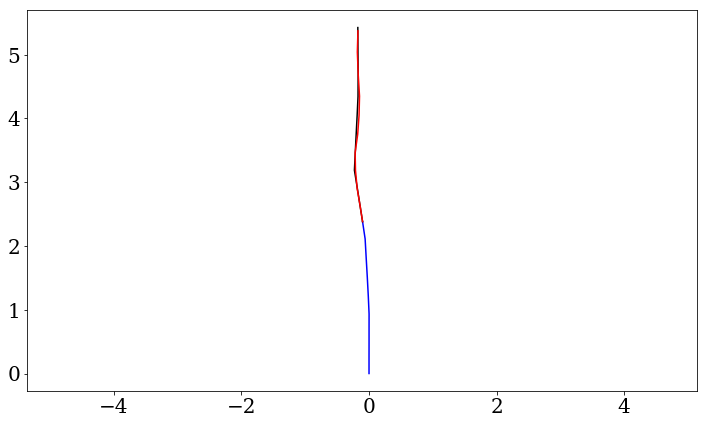

In [31]:
plt.figure(figsize=(12, 7))
plt.rc('font', family='serif')
plt.rc('font', size=20)

ind = 869

plt.plot(in_test_coord[:,ind,0],in_test_coord[:,ind,1],c='b')
plt.plot(gt_test_coord[:,ind,0],gt_test_coord[:,ind,1],c='k')
plt.plot(output_coord[:,ind,0],output_coord[:,ind,1],c='r')
plt.axis('equal')

In [16]:
np.min(dist),np.min(avr)

(0.003550761452660149, 0.0)

In [29]:
ind_dist = np.where(dist == dist.min())
ind_avr = np.where(np.mean(avr,1) == np.mean(avr,1).min())

In [30]:
ind_dist,ind_avr

((array([731]),), (array([869]),))

In [26]:
avr.shape

(1718, 11)

In [27]:
np.mean(avr,1).shape

(1718,)